# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [6]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [7]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [11]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE score's absolute value is generally much larger than GPA, so the amount of variation of the GRE score data from the sample mean (measured in number of points) is much larger than GPA. 

#### Question 4. Drop data points with missing data


In [31]:
df=df_raw.dropna(axis=0,how='any')

In [58]:
df.count()

admit       397
gre         397
gpa         397
prestige    397
dtype: int64

In [59]:
df_raw.iloc[187,2]

nan

In [57]:
df.iloc[187,2]

3.0699999999999998

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Check the count of each column's data to see if they are all the same. Extract the value of a few cells (which previously had 'nan' values) to see if the 'nan' value is still present.

#### Question 6. Create box plots for GRE and GPA

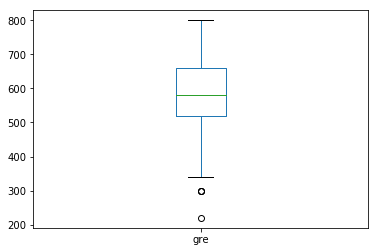

In [37]:
df.gre.plot(kind='box')

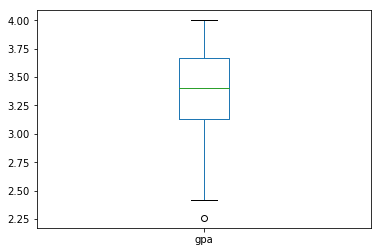

In [39]:
df.gpa.plot(kind='box')

#### Question 7. What do this plots show?

Answer: For GRE scores, there are 2 outliers at the bottom of the dataset and the data are slightly positively skewed. For GPA, there is one outlier at the bottom of the dataset and the data is slightly negatively skewed.

#### Question 8. Describe each distribution 

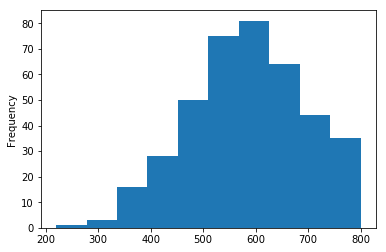

In [44]:
# plot the distribution of each variable 
df.gre.plot(kind='hist')

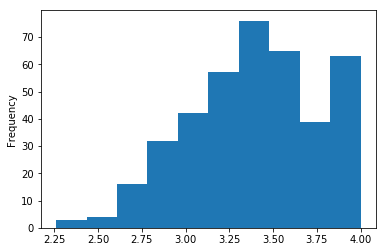

In [45]:
df.gpa.plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: The dataset for each of the variable (GRE and GPA) does not meet the requirement of a normal distribution because of the fat tails on the right.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, to meet the normal distribution requirement, the dataset needs some corrections to address the issue of fat tails (on the right). We can apply certain transformations on the dataset or we can filter out certain sample points above a pre-defined threshold for each data column to make the distribution more even and have lighter tails (on the right). 

#### Question 11. Which of our variables are potentially colinear? 

In [46]:
# create a correlation matrix for the data
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: GRE and GPA have a correlation of 0.38 which could potentially imply collinearity in the multiple regression model that includes both GRE and GPA as predictive variables.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: We will use data in the 'admissions.csv' file and a simple linear regression model to explore the association between grad school admissions rate and prestige of undergraduate schools. The dependent variable will be grad school admission outcome (yes/no or 1/0) and the predictive variable will be prestige of undergraduate schools with an ordinal number from 1 to 4. We will look at a few output items in the regression result such as linear coefficient, p-value and confidence interval to analyze whether there is a significant association between grad school admissions rates and prestige of undergraduate schools.

#### Question 14. What is your hypothesis? 

Answer: 
Null hypothesis: The prestige of undergraduate schools (represented by a number on the scale of 1 to 4) does not have an association with the grad school admission rate for candidates in different 'prestige' groups.
Alternative hypothesis: Better prestige of undergraduate schools (represented by a smaller number on the scale of 1 to 4) is associated with a higher grad school admission rate for candidates in different 'prestige' groups.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data
Answer to Question 1: We can fill the missing value in a particular observation/row with the mean or median of the respective data column, or based on certain rules defined by the data user.

#### 2. Bonus: Log transform the skewed data

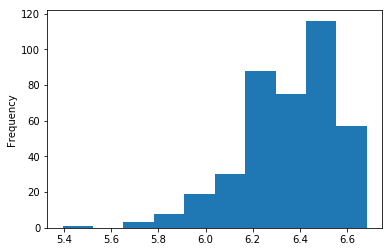

In [54]:
#Answer to Question 2
log_gre=np.log(df.gre)
log_gre.plot(kind="hist")

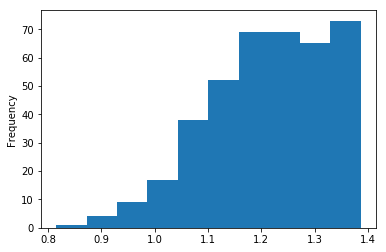

In [55]:
#Answer to Question 2
log_gpa=np.log(df.gpa)
log_gpa.plot(kind='hist')

#### 3. Advanced: Impute missing data
Answer to Question 3: We can use the mean or median or mode or value from the last observation of the data column to substitute the missing value in an observation/row. We can also use a fitted value (from the result of a regression model based on other sample data points) to fill the missing value in a particular observation/row.